In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

path = "c:\Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

## 데이터 불러오기

In [97]:
subway2019 = pd.read_excel('./2019_1_to_8.xlsx', header = 1)
subway2020 = pd.read_csv('./2020_1_to_8.csv', encoding='cp949')
subway2021 = pd.read_csv('./subway.csv', encoding='cp949')

## 2019 승차인원 최상위 최하위

<BarContainer object of 5 artists>

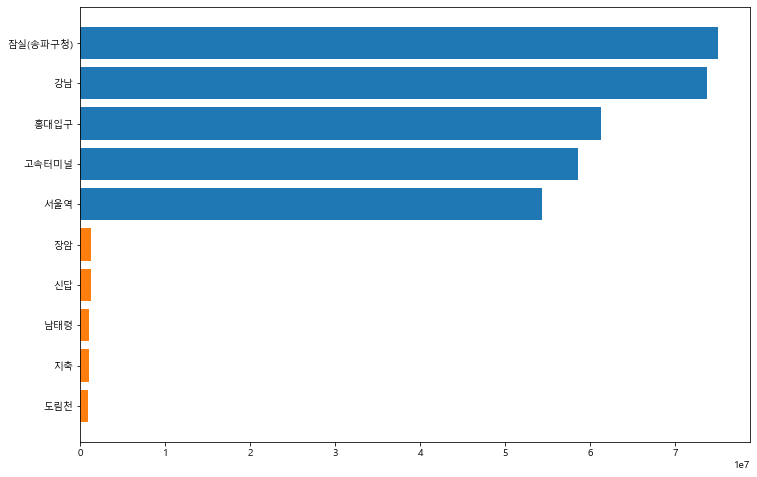

In [98]:
sum2019 = subway2019.iloc[:, [3, -1]].copy()
sum2019 = sum2019.groupby('역명', as_index=True).sum()
sum2019 = sum2019.sort_values(by=['합 계'], ascending=False)
plt.figure(figsize=(12, 8))
plt.gca().invert_yaxis()
plt.barh(sum2019.head(5).index, sum2019.head(5)['합 계'])
plt.barh(sum2019.tail(5).index, sum2019.tail(5)['합 계'])

## 2020 승차인원 최상위 최하위

<BarContainer object of 5 artists>

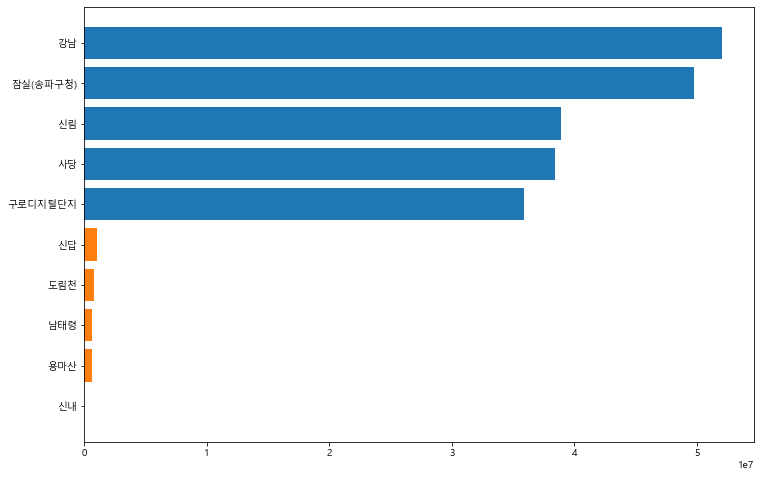

In [99]:
subway2020['합 계'] = subway2020.iloc[:, 5:].sum(axis=1)
sum2020 = subway2020.iloc[:, [3, -1]].copy()
sum2020 = sum2020.groupby('역명', as_index=True).sum()
sum2020 = sum2020.sort_values(by=['합 계'], ascending=False)
plt.figure(figsize=(12, 8))
plt.gca().invert_yaxis()
plt.barh(sum2020.head(5).index, sum2020.head(5)['합 계'])
plt.barh(sum2020.tail(5).index, sum2020.tail(5)['합 계'])


## 2019-2020 승차인원 증감

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


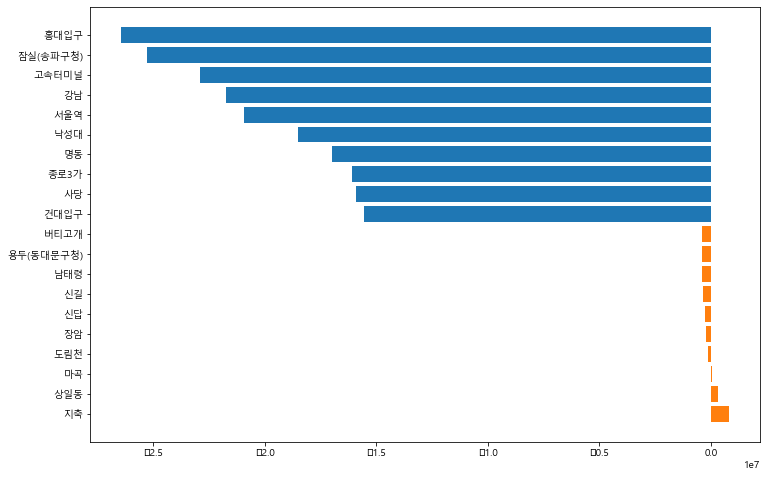

In [100]:
def plotDifference(df1, df2):
    temp1 = df1.iloc[:, [3, -1]].copy()
    temp1 = temp1.groupby('역명', as_index=False).sum()
    temp2 = df2.iloc[:, [3, -1]].copy()
    temp2 = temp2.groupby('역명', as_index=True).sum()
    sumDiff = pd.merge(temp1, temp2, on='역명', how = 'inner')
    sumDiff['증감'] = sumDiff.iloc[:, 2] - sumDiff.iloc[:, 1]
    sumDiff = sumDiff.set_index('역명')
    sumDiff = sumDiff.sort_values(by='증감')
    plt.figure(figsize=(12, 8))
    plt.gca().invert_yaxis()
    plt.barh(sumDiff.head(10).index, sumDiff.head(10)['증감'])
    plt.barh(sumDiff.tail(10).index, sumDiff.tail(10)['증감'])

plotDifference(subway2019, subway2020)


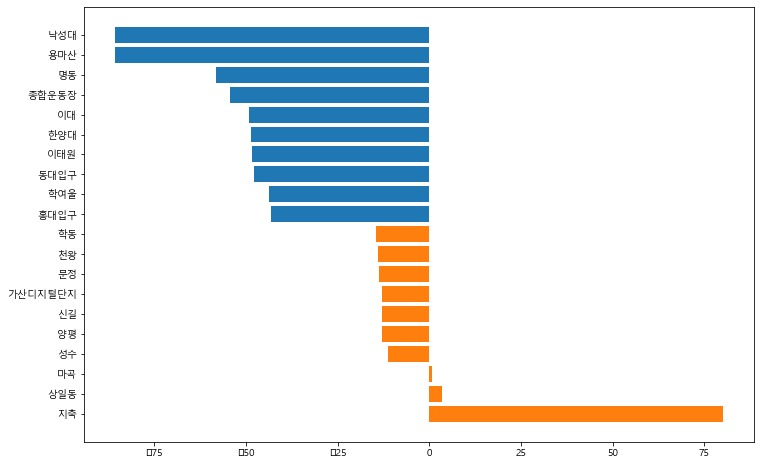

In [101]:
def plotDifferencePercent(df1, df2):
    temp1 = df1.iloc[:, [3, -1]].copy()
    temp1 = temp1.groupby('역명', as_index=False).sum()
    temp2 = df2.iloc[:, [3, -1]].copy()
    temp2 = temp2.groupby('역명', as_index=True).sum()
    sumDiff = pd.merge(temp1, temp2, on='역명', how='inner')
    sumDiff['증감%'] = (sumDiff.iloc[:, 2] - sumDiff.iloc[:, 1]) / sumDiff.iloc[:, 1] * 100
    sumDiff = sumDiff.set_index('역명')
    sumDiff = sumDiff.sort_values(by='증감%')
    plt.figure(figsize=(12, 8))
    plt.gca().invert_yaxis()
    plt.barh(sumDiff.head(10).index, sumDiff.head(10)['증감%'])
    plt.barh(sumDiff.tail(10).index, sumDiff.tail(10)['증감%'])

plotDifferencePercent(subway2019, subway2020)


## 2019년, 2021년 9월 비교

In [102]:
subway201909 = subway2019[subway2019['날짜'].dt.month == 9]
subway201909

,날짜,호선,역번호,역명,구분,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후,합 계
133650,2019-09-01,1호선,150,서울역,승차,362,344,531,989,1356,...,3393,3693,3424,3043,2861,2654,2435,894,22,41791
133651,2019-09-01,1호선,150,서울역,하차,206,1076,1087,1261,1950,...,3140,3057,2705,2579,2035,1562,1003,570,177,37775
133652,2019-09-01,1호선,151,시청,승차,87,77,146,220,320,...,1441,1598,1265,1152,1124,785,500,206,6,13474
133653,2019-09-01,1호선,151,시청,하차,55,350,465,782,1007,...,959,629,432,284,241,278,173,120,42,13575
133654,2019-09-01,1호선,152,종각,승차,228,169,160,246,313,...,2239,2171,2037,2038,1902,1847,1211,486,23,21563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,2019-09-30,8호선,2825,신흥,하차,20,84,141,229,202,...,377,420,669,600,346,298,229,170,73,5430
150146,2019-09-30,8호선,2826,수진,승차,158,288,701,968,484,...,418,374,358,196,163,141,124,47,9,6305
150147,2019-09-30,8호선,2826,수진,하차,26,75,202,630,246,...,386,397,631,569,336,273,266,160,59,5855
150148,2019-09-30,8호선,2827,모란,승차,73,132,462,537,272,...,434,382,420,245,155,162,146,46,20,5085


In [103]:
subway202009 = subway2020[subway2020['날짜'].str.contains('2020-09')]
subway202009

,날짜,호선,역번호,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,...,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 ~ 24:00,24:00 이후,합 계
134580,2020-09-01,1호선,150,서울역,승차,349,398,1144,1783,1052,...,1662,3447,5802,2520,1556,1331,632,239,2,28692
134581,2020-09-01,1호선,150,서울역,하차,190,1036,2984,6074,3595,...,1097,1472,1677,1070,624,487,258,164,12,27293
134582,2020-09-01,1호선,151,시청,승차,61,99,218,255,256,...,1051,2385,4680,1722,1246,1068,391,108,1,16553
134583,2020-09-01,1호선,151,시청,하차,141,643,2506,5948,2651,...,313,293,271,181,95,101,35,23,2,16437
134584,2020-09-01,1호선,152,종각,승차,78,92,168,234,347,...,1641,4208,6628,2686,1968,1553,539,139,4,25325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151223,2020-09-30,8호선,2825,신흥,하차,17,35,33,69,92,...,197,180,138,135,126,113,92,58,5,2117
151224,2020-09-30,8호선,2826,수진,승차,50,74,108,154,172,...,180,160,115,83,63,48,42,13,0,2244
151225,2020-09-30,8호선,2826,수진,하차,11,40,41,65,74,...,148,145,145,128,111,96,86,52,8,1925
151226,2020-09-30,8호선,2827,모란,승차,37,48,54,94,107,...,146,144,102,89,64,65,60,17,0,1875


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


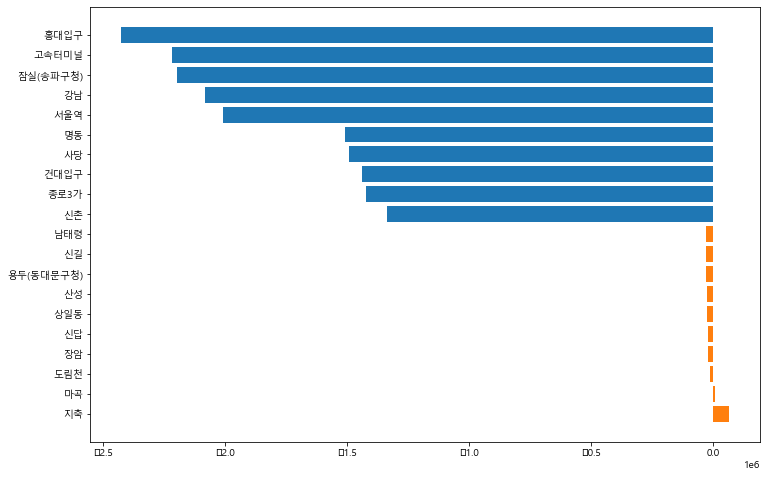

In [104]:
plotDifference(subway201909, subway202009)

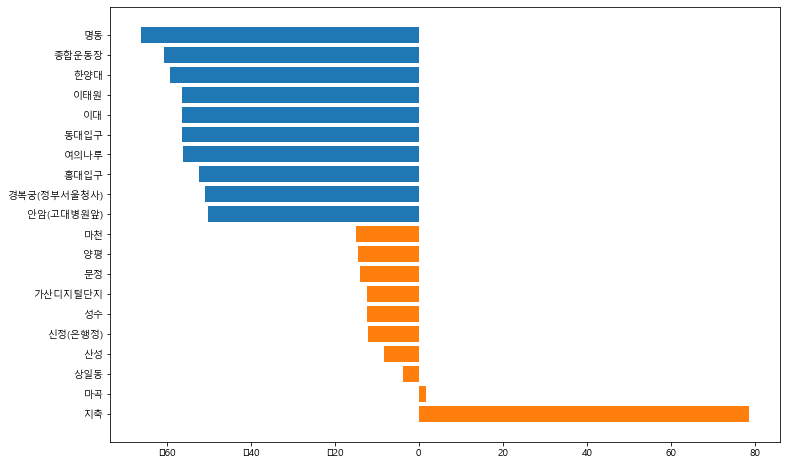

In [105]:
plotDifferencePercent(subway201909, subway202009)

## 2020년 9월, 10월 비교 (수도권 거리두기 2.5단계->1단계 완화)

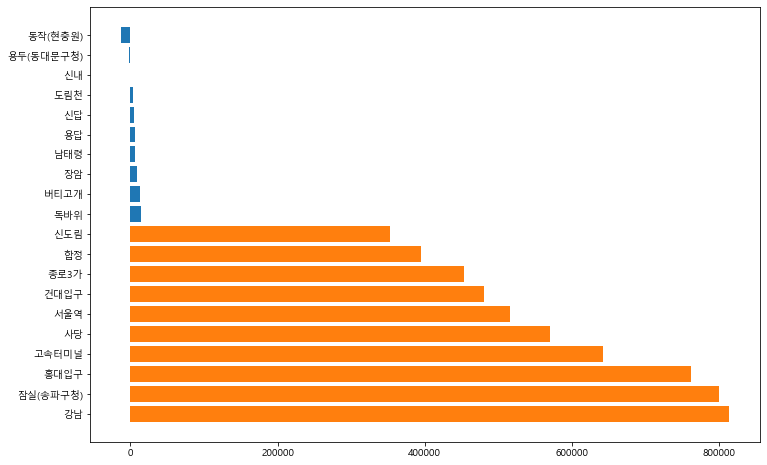

In [117]:
subway202009 = subway2020[subway2020['날짜'].str.contains('2020-09')]
subway202010 = subway2020[subway2020['날짜'].str.contains('2020-10')]
plotDifference(subway202009, subway202010)


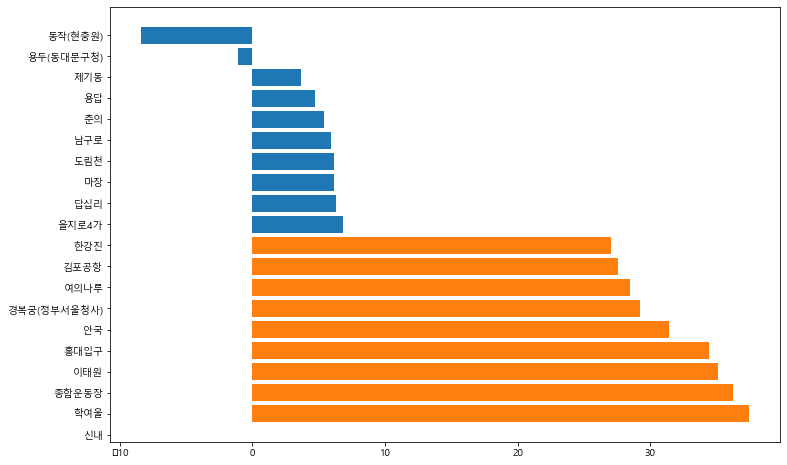

In [118]:
plotDifferencePercent(subway202009, subway202010)

## 2020년 10월, 12월 비교 (수도권 사회적 거리두기 1->2.5단계 격상)

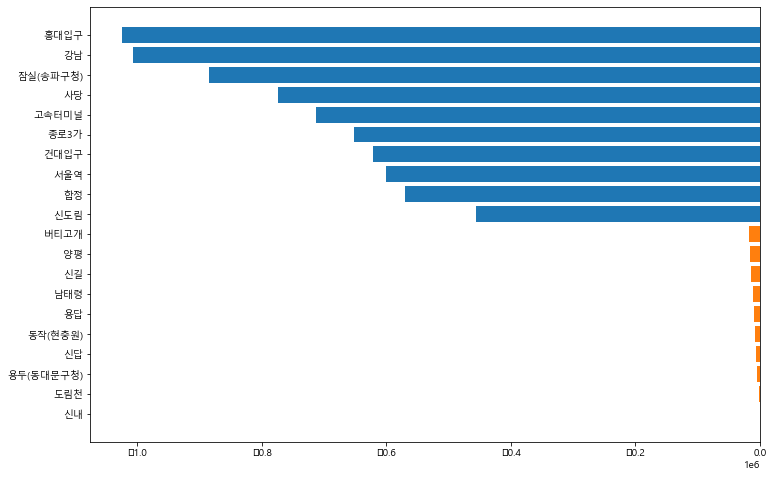

In [107]:
subway202012 = subway2020[subway2020['날짜'].str.contains('2020-12')]
plotDifference(subway202010, subway202012)

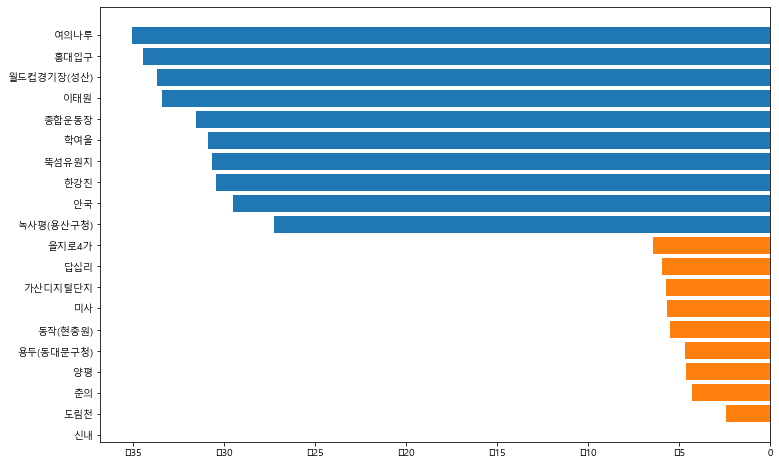

In [108]:
plotDifferencePercent(subway202010, subway202012)

## 2020년, 2021년 8월 비교

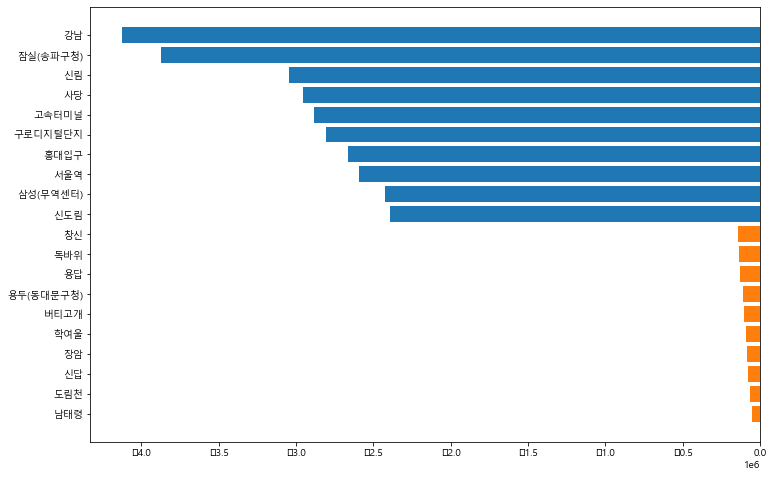

In [109]:
subway202008 = subway2020[subway2020['날짜'].str.contains('2020-08')]
subway202108 = subway2021[subway2021['날짜'].str.contains('2021-08')]
plotDifference(subway202008, subway202108)

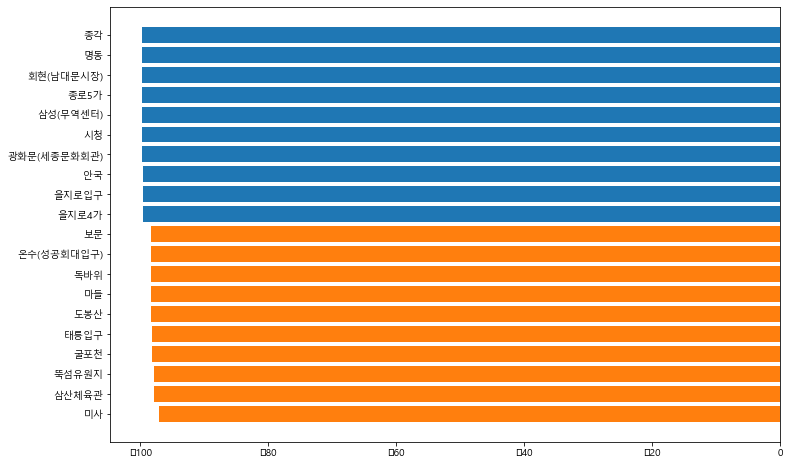

In [110]:
plotDifferencePercent(subway202008, subway202108)

## 2020년 4월, 5월 비교 (이태원발 코로나바이러스 집단 감염, 거리두기 완화)

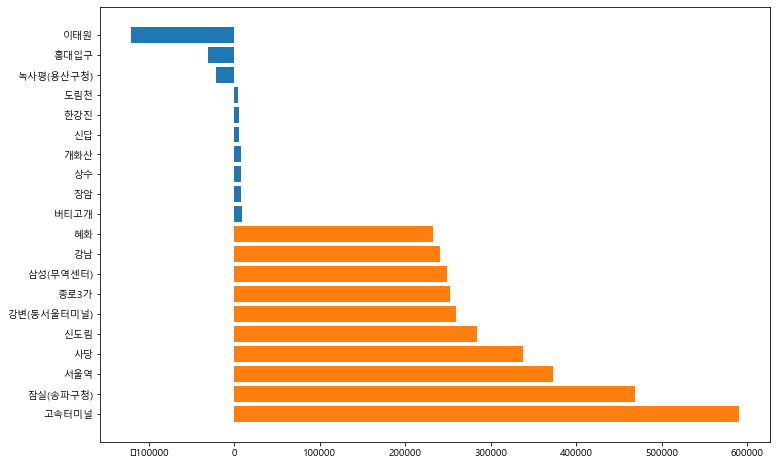

In [111]:
subway202004 = subway2020[subway2020['날짜'].str.contains('2020-04')]
subway202005 = subway2020[subway2020['날짜'].str.contains('2020-05')]
plotDifference(subway202004, subway202005)

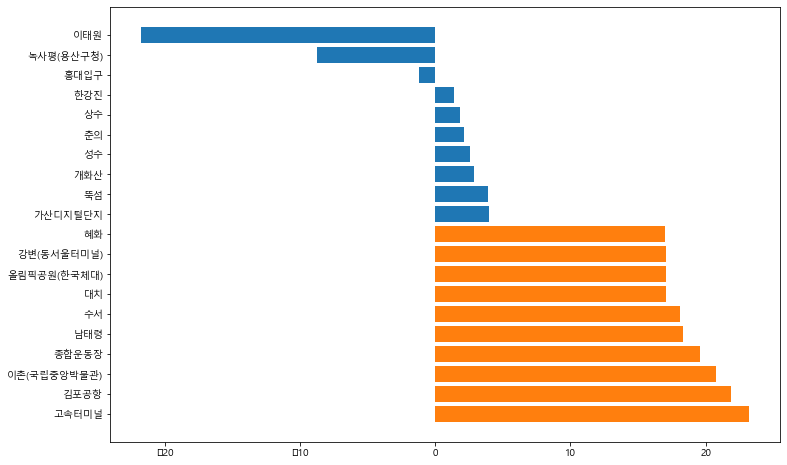

In [112]:
plotDifferencePercent(subway202004, subway202005)

## 2020년 7월, 8월 비교(사랑제일교회 코로나바이러스 집단 감염)

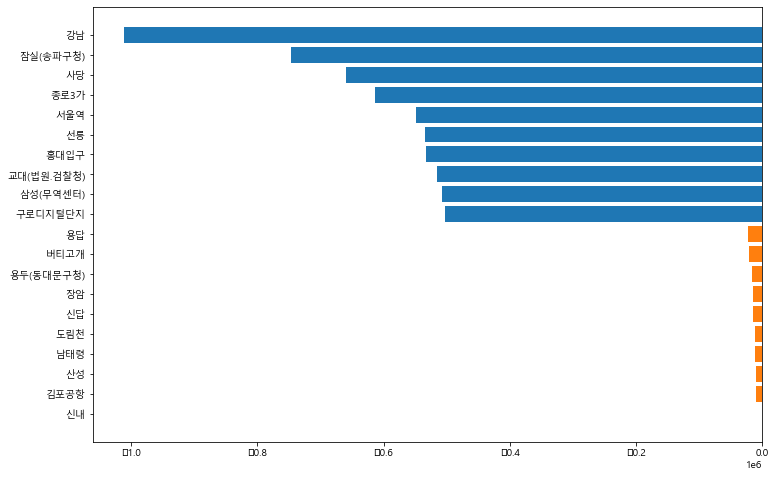

In [113]:
subway202007 = subway2020[subway2020['날짜'].str.contains('2020-07')]
# 하남풍산역 8월부터 집계되어 삭제
subway202007 = subway202007.drop(subway202007[subway202007['역명']=='하남풍산'].index)
plotDifference(subway202007, subway202008)


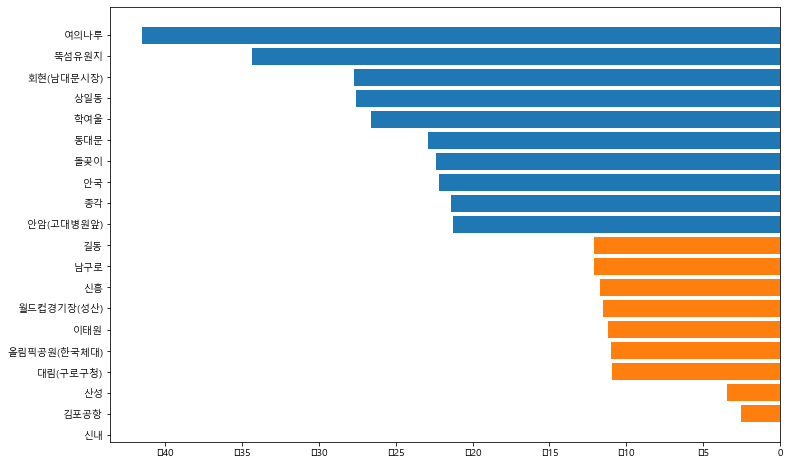

In [114]:
plotDifferencePercent(subway202007, subway202008)

## 2020년 12월, 2021년 2월 비교 (2.5단게 + 특별방역대책 -> 2단계 완화)

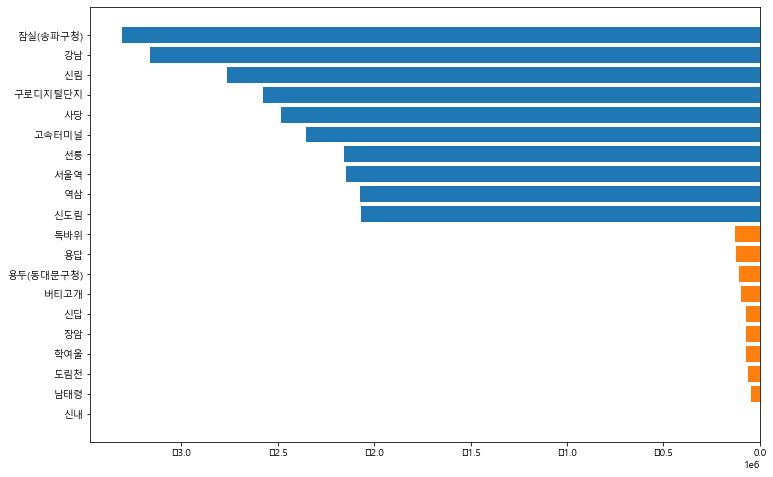

In [115]:
subway202102 = subway2021[subway2021['날짜'].str.contains('2021-02')]
plotDifference(subway202012, subway202102)

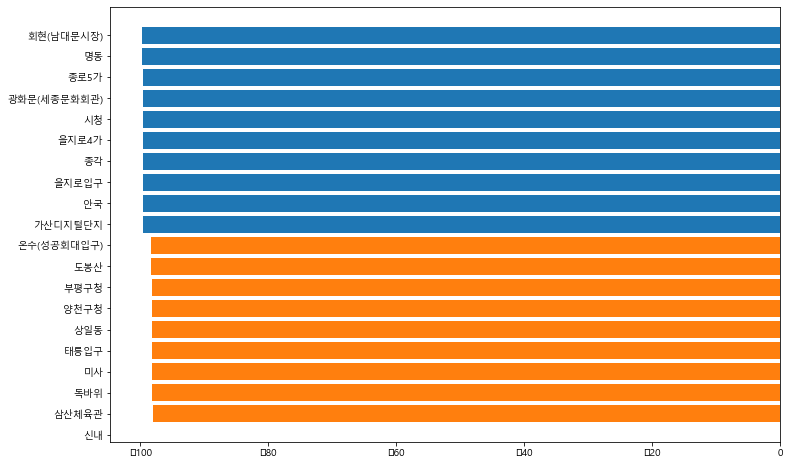

In [116]:
plotDifferencePercent(subway202012, subway202102)